In [ ]:
# Phase 1: Setup and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Mount Google Drive ---

from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:

# --- Load the Data ---

file_path = '/content/drive/MyDrive/Colab Notebooks/delhiaqi.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}.")
    print("Please ensure the file exists at this location in your Google Drive and the path is correct.")

except Exception as e:
    print(f"An error occurred while loading the data: {e}")



Data loaded successfully from: /content/drive/MyDrive/Colab Notebooks/delhiaqi.csv


In [ ]:
# --- Initial Data Exploration ---

if 'df' in locals():
    print("\n--- Initial Data Info ---")
    df.info()
    print("\n--- First 5 Rows ---")
    print(df.head())
    print("\n--- Summary Statistics ---")
    print(df.describe())
else:
    print("\nSkipping further steps as data loading failed.")



--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB

--- First 5 Rows ---
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12 

In [ ]:
# Phase 2: Data Cleaning & Preprocessing

    print("\n--- Cleaning and Preprocessing ---")

    df.index = pd.to_datetime(df.index, errors='coerce')

    print(f"Rows with invalid dates: {df.index.isnull().sum()}")
    df = df[~df.index.isnull()]



    print("\n--- Missing Values Before Handling ---")
    print(df.isnull().sum())

    df_interpolated = df.interpolate(method='time')

    print("\n--- Missing Values After Interpolation ---")
    print(df_interpolated.isnull().sum())
    df = df_interpolated
    df.dropna(inplace=True)


    pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for col in pollutant_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')


    print("\n--- Missing Values After Ensuring Numeric Types ---")
    print(df.isnull().sum())
    df.dropna(inplace=True)

    print("\n--- Data Types After Cleaning ---")
    df.info()
    print("\nData cleaning and preprocessing complete.")


--- Cleaning and Preprocessing ---
Rows with invalid dates: 0

--- Missing Values Before Handling ---
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

--- Missing Values After Interpolation ---
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

--- Missing Values After Ensuring Numeric Types ---
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

--- Data Types After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2023-01-01 00:00:00 to 2023-01-24 08:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      561 non-null    float64
 1   no      561 non-null    float64
 2   no2     561 non-null    float64
 3   o3      561 non-null    float64
 4   so2     561 non-null    float64
 5   pm2_5   561 non-null    float64
 6   pm10    561 non-null


--- Starting EDA & Visualization ---

*NOTE: The provided dataset does not include a pre-calculated AQI column.
Analysis will focus on key pollutant concentrations (PM2.5, PM10, etc.) as indicators of air quality.
Trends observed in these pollutants directly inform our understanding of air quality dynamics.*

Plotting overall time series trends...


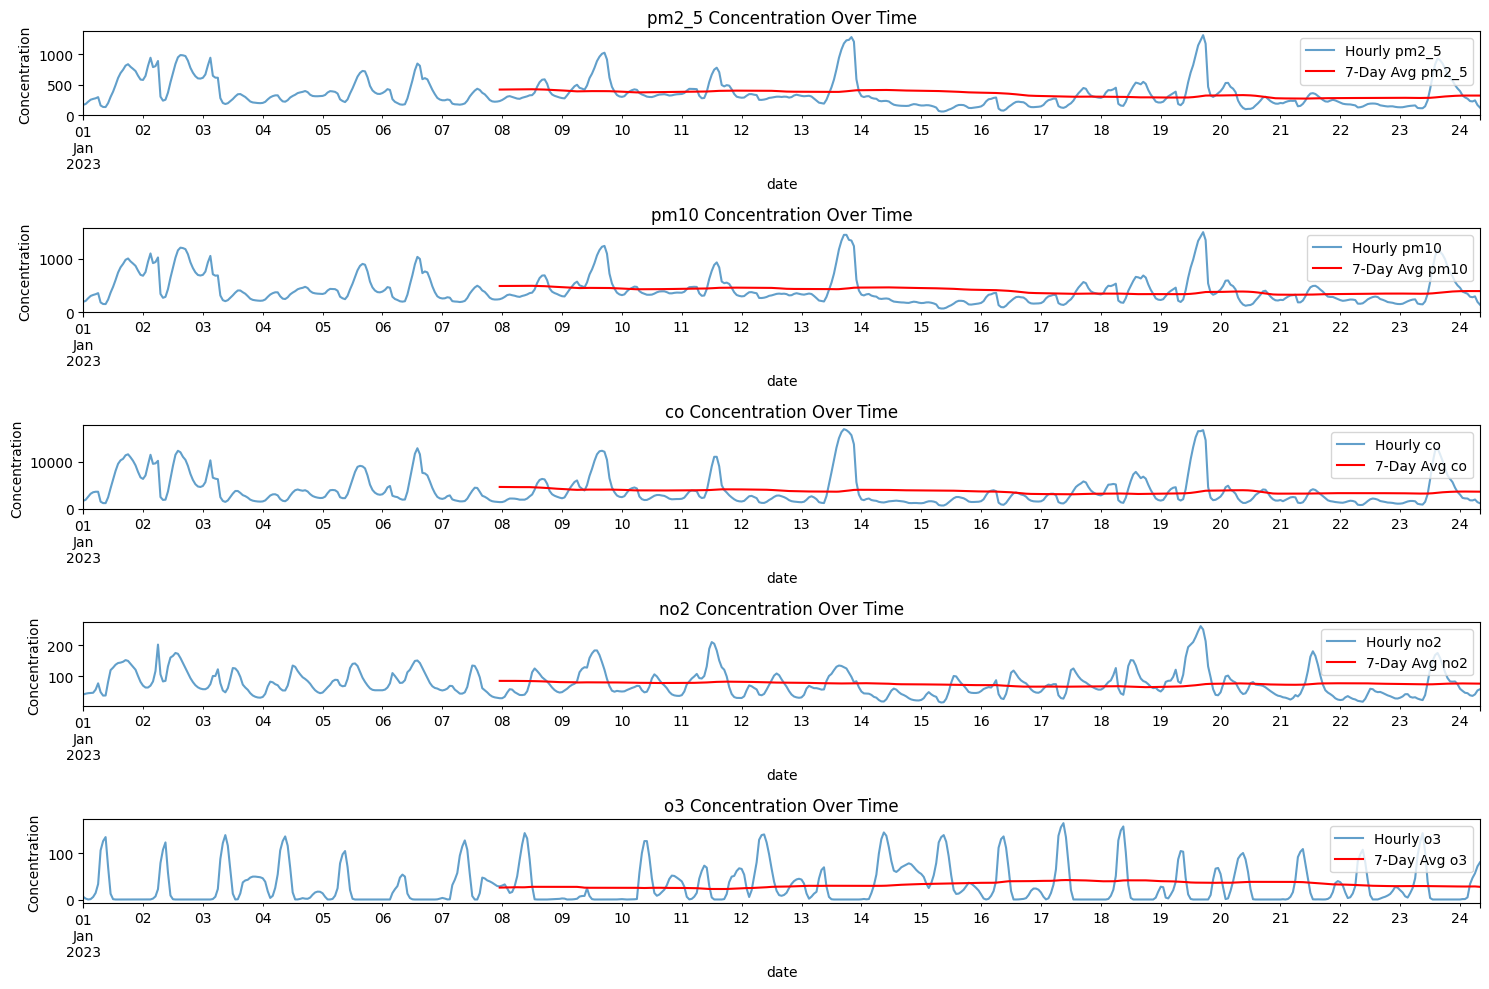


Analyzing seasonal patterns...


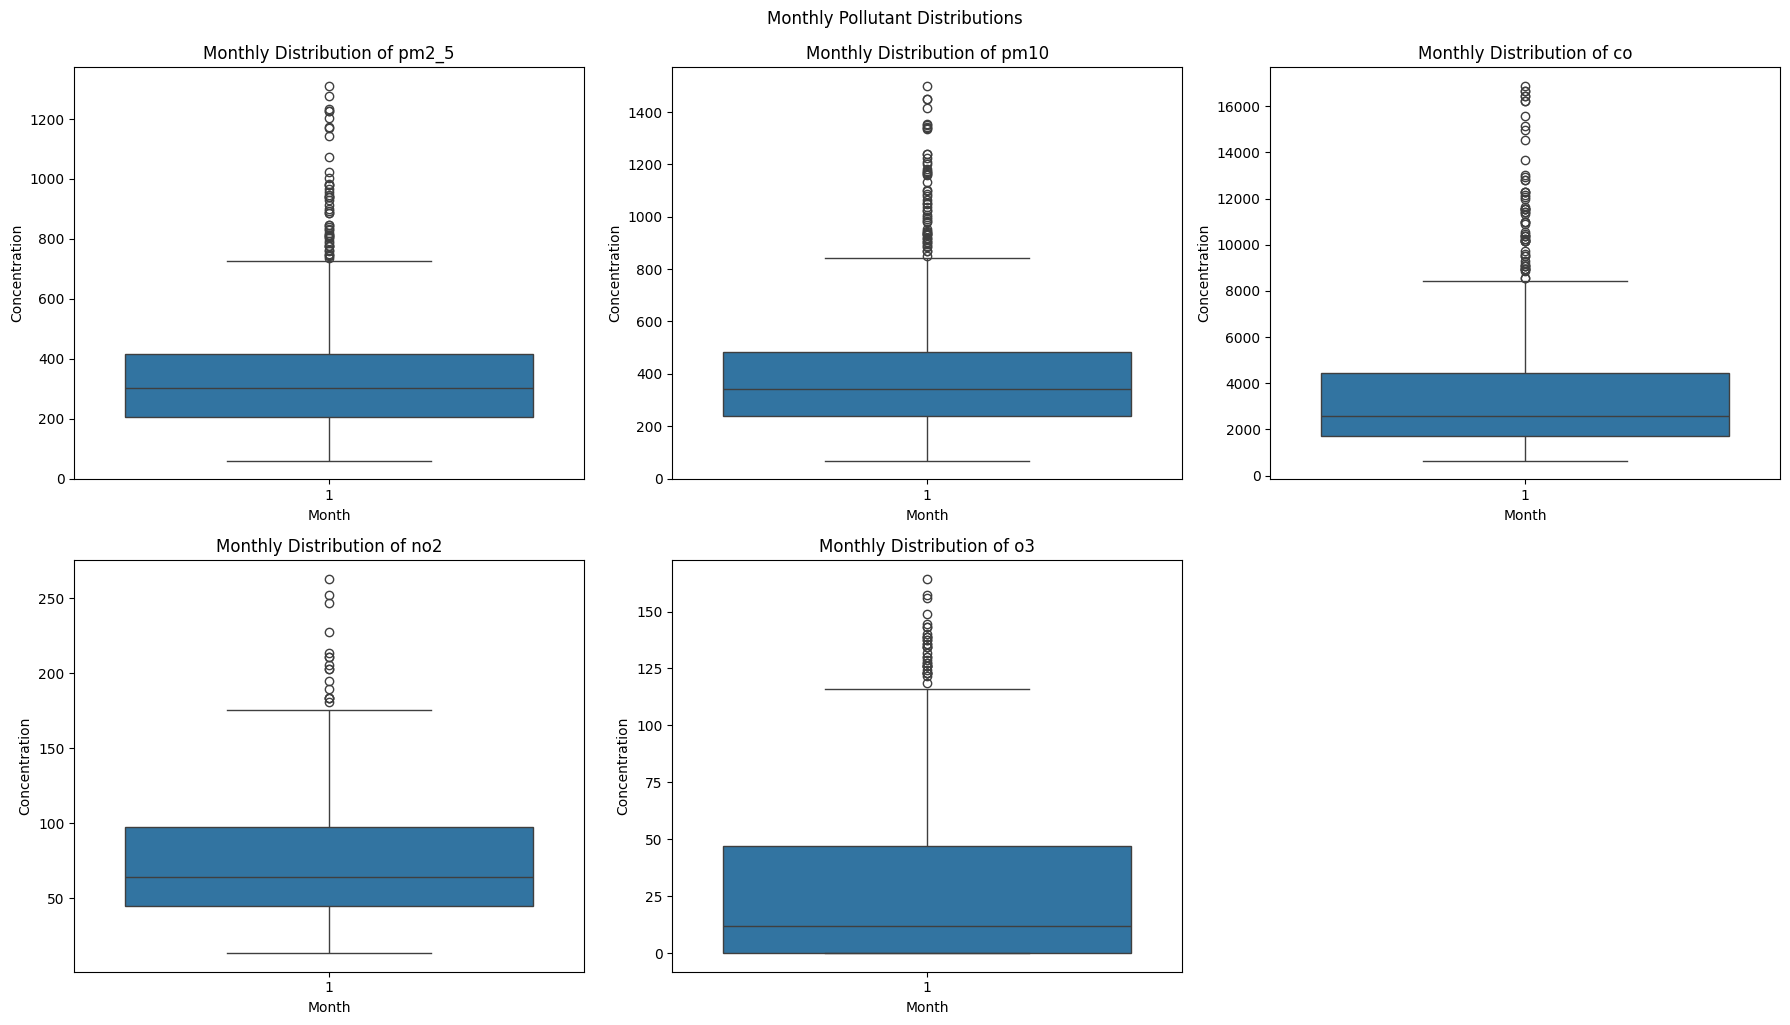

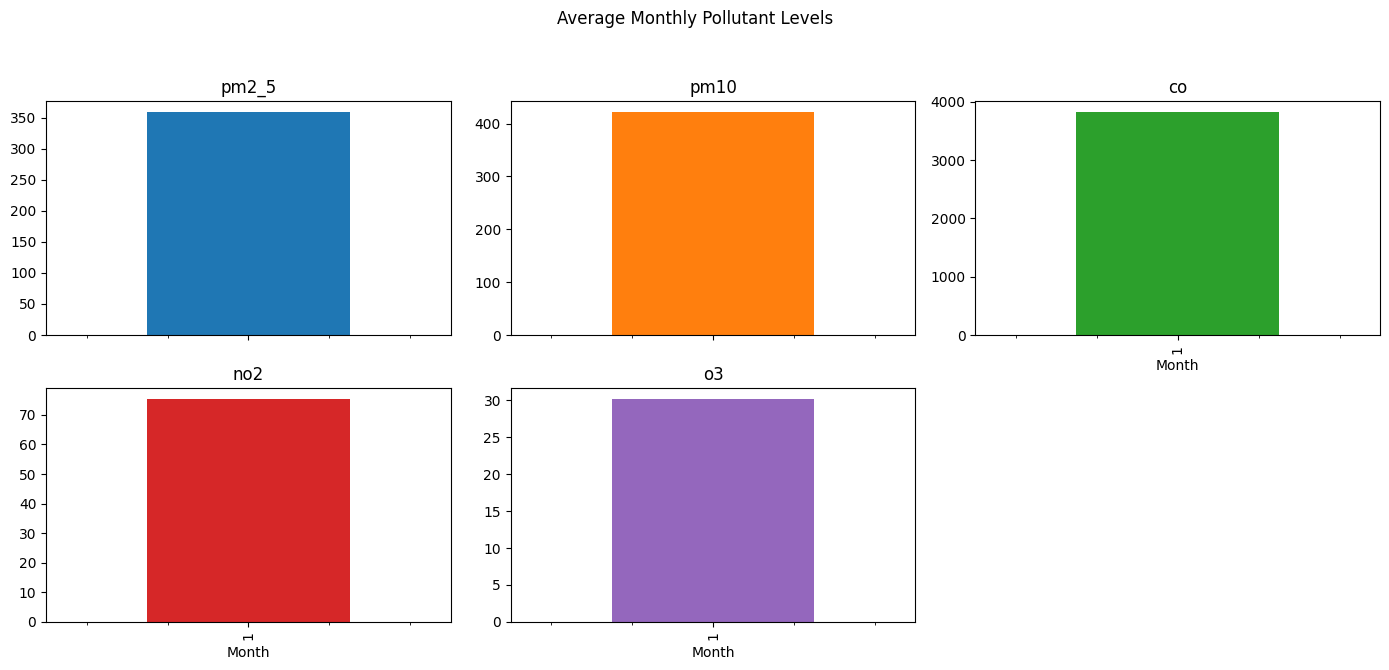


Analyzing relationships between pollutants...


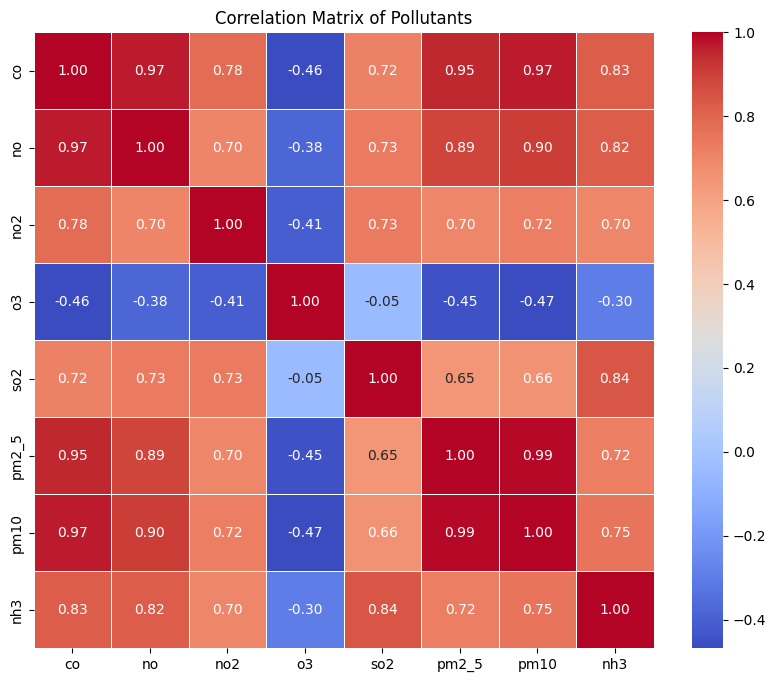

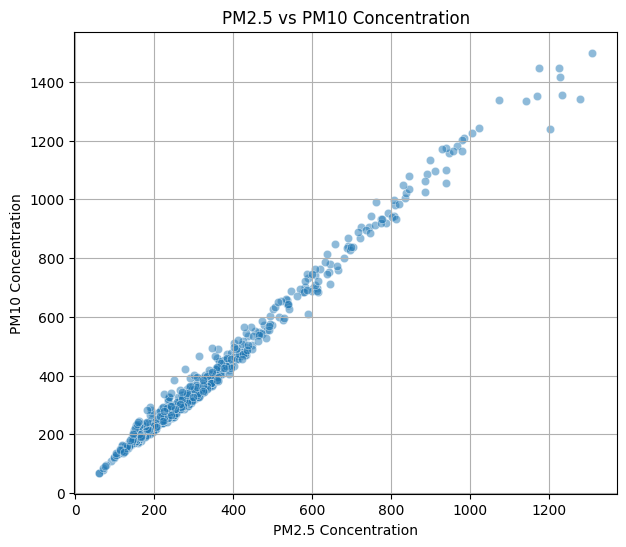


Plotting pollutant distributions...


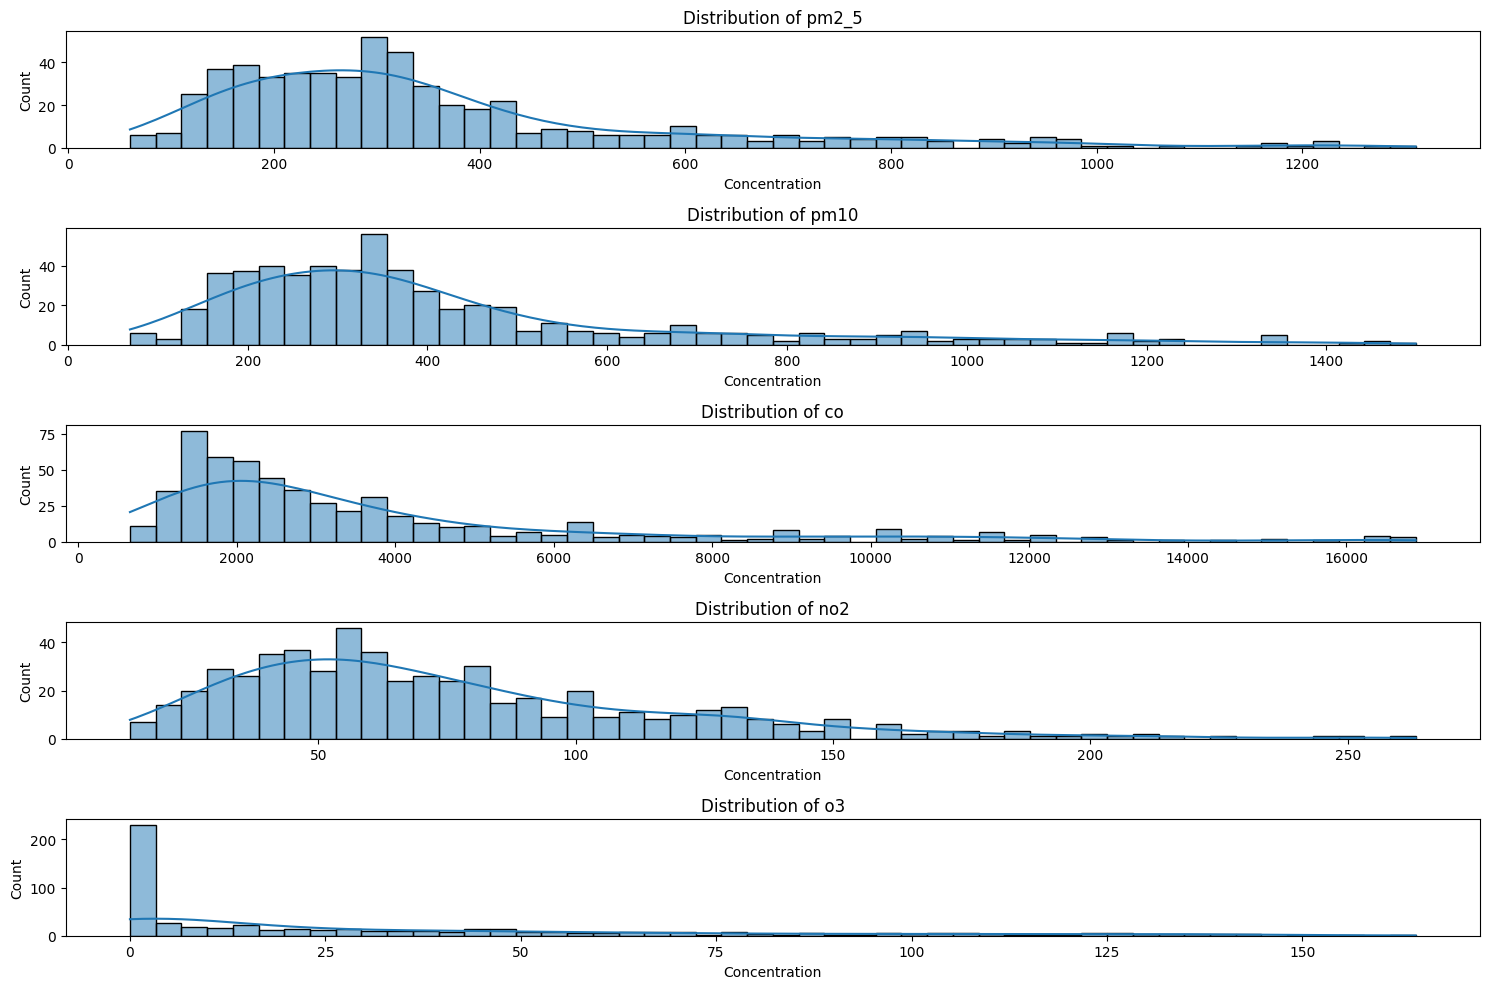


Analyzing diurnal patterns...


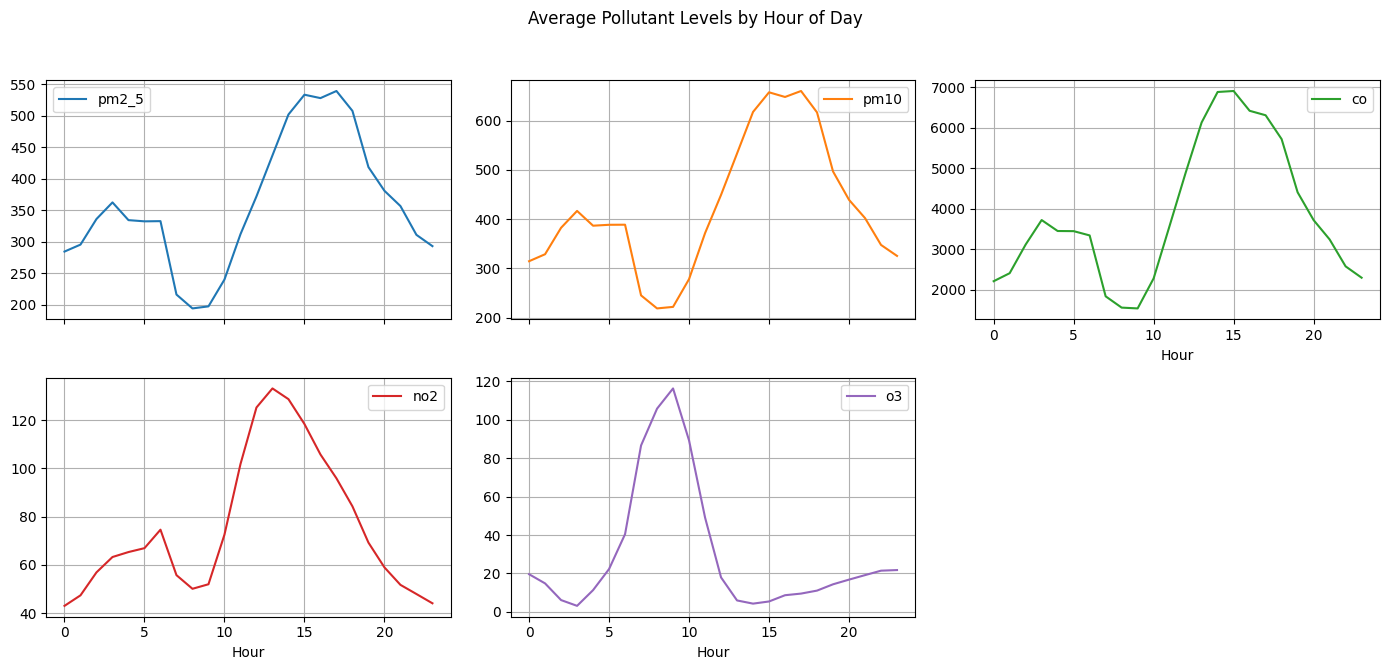

In [ ]:
# Phase 3: Exploratory Data Analysis (EDA) & Visualization

if 'df' in locals() and not df.empty:
    print("\n--- Starting EDA & Visualization ---")

    # --- Acknowledge Missing AQI Column ---
    print("\n*NOTE: The provided dataset does not include a pre-calculated AQI column.")
    print("Analysis will focus on key pollutant concentrations (PM2.5, PM10, etc.) as indicators of air quality.")
    print("Trends observed in these pollutants directly inform our understanding of air quality dynamics.*")


    key_pollutants = ['pm2_5', 'pm10', 'co', 'no2', 'o3']

    # --- 1. Overall Time Series Trends ---
    print("\nPlotting overall time series trends...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(key_pollutants):
        plt.subplot(len(key_pollutants), 1, i+1)
        df[col].plot(label=f'Hourly {col}', alpha=0.7)
        df[col].rolling(window=168).mean().plot(label=f'7-Day Avg {col}', color='red')
        plt.title(f'{col} Concentration Over Time')
        plt.ylabel('Concentration')
        plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 2. Seasonal Analysis ---
    print("\nAnalyzing seasonal patterns...")
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Hour'] = df.index.hour

    # Boxplot by Month
    plt.figure(figsize=(18, 10))
    for i, col in enumerate(key_pollutants):
        plt.subplot(2, 3, i+1) # Adjust grid as needed
        sns.boxplot(x='Month', y=col, data=df)
        plt.title(f'Monthly Distribution of {col}')
        plt.xlabel('Month')
        plt.ylabel('Concentration')
    plt.tight_layout()
    plt.suptitle('Monthly Pollutant Distributions', y=1.02)
    plt.show()

    # Average Monthly Levels
    monthly_avg = df.groupby('Month')[key_pollutants].mean()
    monthly_avg.plot(kind='bar', figsize=(14, 7), subplots=True, layout=(2,3), legend=False)
    plt.suptitle('Average Monthly Pollutant Levels')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- 3. Pollutant Relationships ---
    print("\nAnalyzing relationships between pollutants...")
    correlation_matrix = df[pollutant_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Pollutants')
    plt.show()

    # Scatter plot example (PM2.5 vs PM10)
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x='pm2_5', y='pm10', data=df, alpha=0.5)
    plt.title('PM2.5 vs PM10 Concentration')
    plt.xlabel('PM2.5 Concentration')
    plt.ylabel('PM10 Concentration')
    plt.grid(True)
    plt.show()

    # --- 4. Pollutant Distributions ---
    print("\nPlotting pollutant distributions...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(key_pollutants):
        plt.subplot(len(key_pollutants), 1, i+1)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Concentration')
    plt.tight_layout()
    plt.show()

    # --- 5. Diurnal (Daily) Patterns ---
    print("\nAnalyzing diurnal patterns...")
    hourly_avg = df.groupby('Hour')[key_pollutants].mean()
    hourly_avg.plot(kind='line', figsize=(14, 7), subplots=True, layout=(2,3), legend=True, grid=True)
    plt.suptitle('Average Pollutant Levels by Hour of Day')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.xlabel("Hour of Day")
    plt.show()

else:
     print("\nSkipping EDA as data is not loaded or is empty.")